# Plotting ML Algorithms Results for IQA Prediction

In [120]:
# Imports

import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib import style
import seaborn as sns

In [121]:
# Global var
JSON_FILENAME = "metrics1.json"
CSV_FILENAME = "targets1.csv"
CSV_FILENAME2 = "3params_targets1.csv"

# Color palette
colors = sns.color_palette()

In [122]:
# Read json file

# Open json
json_file = open(JSON_FILENAME)
# Open csv 1
csv_dataframe = pd.read_csv(CSV_FILENAME)
# Open csv 2
csv_dataframe_3params = pd.read_csv(CSV_FILENAME2)

# Return json object as dict
metrics_data = json.load(json_file)

# Drop column of csv 1
csv_dataframe.drop('Unnamed: 0', axis=1, inplace=True)
print(csv_dataframe.columns)

# Drop column of csv 2
csv_dataframe_3params.drop('Unnamed: 0', axis=1, inplace=True)
print(csv_dataframe_3params.columns)

Index(['Data Coleta', 'y_test', 'svm_target', 'rf_target', 'dt_target',
       'mlp_target'],
      dtype='object')
Index(['Data Coleta', 'y_test', 'svm_target', 'rf_target', 'dt_target',
       'mlp_target'],
      dtype='object')


In [123]:
# Organize R2 metrics for each algorithm

def organize_metrics(metric, metrics_data):
    
    if metric == "R2":
        r2_svm = []
        r2_rf = []
        r2_dt = []
        r2_mlp = []
        
        for item in metrics_data["SVM"]:
            r2_svm.append(item["R2"])

        for item in metrics_data["RF"]:
            r2_rf.append(item["R2"])

        for item in metrics_data["DT"]:
            r2_dt.append(item["R2"])

        for item in metrics_data["MLP"]:
            r2_mlp.append(item["R2"])

        return r2_svm, r2_rf, r2_dt, r2_mlp

    elif metric == "R":
        r_svm = []
        r_rf = []
        r_dt = []
        r_mlp = []
        
        for item in metrics_data["SVM"]:
            r_svm.append(item["R"])

        for item in metrics_data["RF"]:
            r_rf.append(item["R"])

        for item in metrics_data["DT"]:
            r_dt.append(item["R"])

        for item in metrics_data["MLP"]:
            r_mlp.append(item["R"])

        return r_svm, r_rf, r_dt, r_mlp

    elif metric == "RMSE":
        rmse_svm = []
        rmse_rf = []
        rmse_dt = []
        rmse_mlp = []
        
        for item in metrics_data["SVM"]:
            rmse_svm.append(item["RMSE"])

        for item in metrics_data["RF"]:
            rmse_rf.append(item["RMSE"])

        for item in metrics_data["DT"]:
            rmse_dt.append(item["RMSE"])

        for item in metrics_data["MLP"]:
            rmse_mlp.append(item["RMSE"])

        return rmse_svm, rmse_rf, rmse_dt, rmse_mlp

    elif metric == "MSE":
            mse_svm = []
            mse_rf = []
            mse_dt = []
            mse_mlp = []
            
            for item in metrics_data["SVM"]:
                mse_svm.append(item["MSE"])
    
            for item in metrics_data["RF"]:
                mse_rf.append(item["MSE"])
    
            for item in metrics_data["DT"]:
                mse_dt.append(item["MSE"])
    
            for item in metrics_data["MLP"]:
                mse_mlp.append(item["MSE"])
    
            return mse_svm, mse_rf, mse_dt, mse_mlp

    elif metric == "MAE":
            mae_svm = []
            mae_rf = []
            mae_dt = []
            mae_mlp = []
            
            for item in metrics_data["SVM"]:
                mae_svm.append(item["MAE"])
    
            for item in metrics_data["RF"]:
                mae_rf.append(item["MAE"])
    
            for item in metrics_data["DT"]:
                mae_dt.append(item["MAE"])
    
            for item in metrics_data["MLP"]:
                mae_mlp.append(item["MAE"])
    
            return mae_svm, mae_rf, mae_dt, mae_mlp


r2_svm, r2_rf, r2_dt, r2_mlp = organize_metrics("R2", metrics_data)
r_svm, r_rf, r_dt, r_mlp = organize_metrics("R", metrics_data)
rmse_svm, rmse_rf, rmse_dt, rmse_mlp = organize_metrics("RMSE", metrics_data)
mse_svm, mse_rf, mse_dt, mse_mlp = organize_metrics("MSE", metrics_data)
mae_svm, mae_rf, mae_dt, mae_mlp = organize_metrics("MAE", metrics_data)

In [124]:
# Defining x axis for plot

x_axis = list(range(9, 2, -1)) # representing number of parameters

## Plot All Results

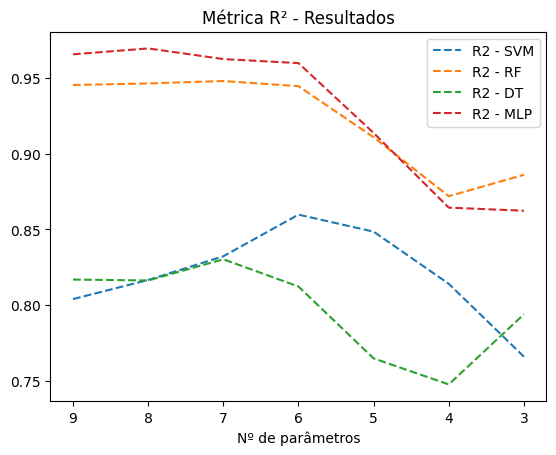

In [125]:
# R2 Line Plotting

fig, ax = plt.subplots()

r2_metric_svm = ax.plot(x_axis, r2_svm, color=colors[0], label="R2 - SVM", linestyle='--')
r2_metric_rf = ax.plot(x_axis, r2_rf, color=colors[1], label="R2 - RF", linestyle='--')
r2_metric_dt = ax.plot(x_axis, r2_dt, color=colors[2], label="R2 - DT", linestyle='--')
r2_metric_mlp = ax.plot(x_axis, r2_mlp, color=colors[3], label="R2 - MLP", linestyle='--')

ax.invert_xaxis()

plt.xticks(rotation=0)

ax.set_title("Métrica R² - Resultados")

ax.set_xlabel("Nº de parâmetros")

ax.legend()
plt.savefig("./images/metrics/R2_results_rank1.png", bbox_inches='tight')
plt.show()

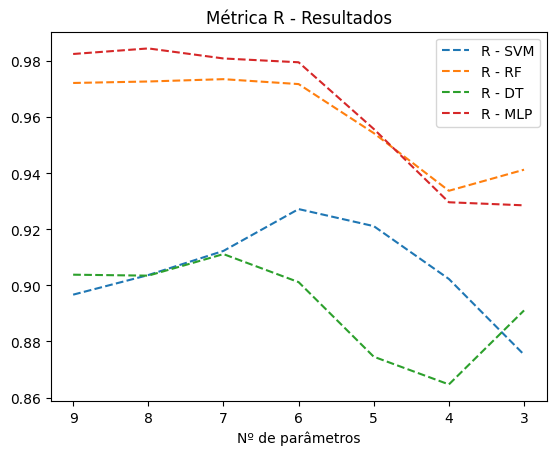

In [126]:
# R Line Plotting

fig, ax = plt.subplots()

r2_metric_svm = ax.plot(x_axis, r_svm, color=colors[0], label="R - SVM", linestyle='--')
r2_metric_rf = ax.plot(x_axis, r_rf, color=colors[1], label="R - RF", linestyle='--')
r2_metric_dt = ax.plot(x_axis, r_dt, color=colors[2], label="R - DT", linestyle='--')
r2_metric_mlp = ax.plot(x_axis, r_mlp, color=colors[3], label="R - MLP", linestyle='--')

ax.invert_xaxis()

plt.xticks(rotation=0)

ax.set_title("Métrica R - Resultados")

ax.set_xlabel("Nº de parâmetros")

ax.legend()
plt.savefig("./images/metrics/R_results_rank1.png", bbox_inches='tight')
plt.show()

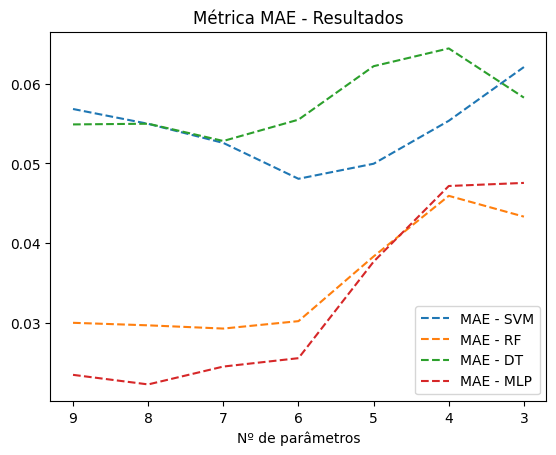

In [127]:
# MAE Line Plotting

fig, ax = plt.subplots()

rmse_metric_svm = ax.plot(x_axis, rmse_svm, color=colors[0], label="MAE - SVM", linestyle='--')
rmse_metric_rf = ax.plot(x_axis, rmse_rf, color=colors[1], label="MAE - RF", linestyle='--')
rmse_metric_dt = ax.plot(x_axis, rmse_dt, color=colors[2], label="MAE - DT", linestyle='--')
rmse_metric_mlp = ax.plot(x_axis, rmse_mlp, color=colors[3], label="MAE - MLP", linestyle='--')

ax.invert_xaxis()

plt.xticks(rotation=0)

ax.set_title("Métrica MAE - Resultados")

ax.set_xlabel("Nº de parâmetros")

ax.legend()
plt.savefig("./images/metrics/MAE_results_rank1.png", bbox_inches='tight')
plt.show()

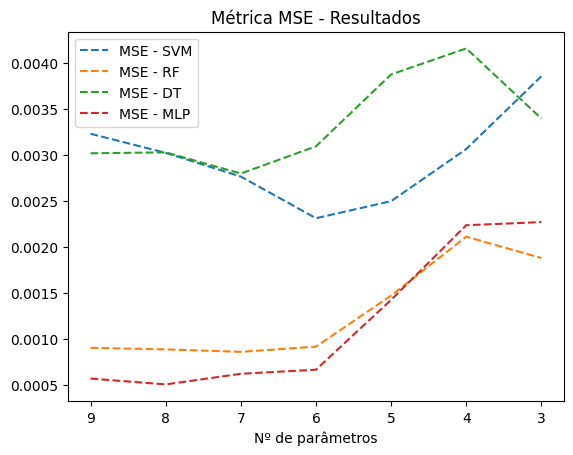

In [128]:
# MSE Line Plotting

fig, ax = plt.subplots()

rmse_metric_svm = ax.plot(x_axis, mse_svm, color=colors[0], label="MSE - SVM", linestyle='--')
rmse_metric_rf = ax.plot(x_axis, mse_rf, color=colors[1], label="MSE - RF", linestyle='--')
rmse_metric_dt = ax.plot(x_axis, mse_dt, color=colors[2], label="MSE - DT", linestyle='--')
rmse_metric_mlp = ax.plot(x_axis, mse_mlp, color=colors[3], label="MSE - MLP", linestyle='--')

ax.invert_xaxis()

plt.xticks(rotation=0)

ax.set_title("Métrica MSE - Resultados")

ax.set_xlabel("Nº de parâmetros")

ax.legend()
plt.savefig("./images/metrics/MSE_results_rank1.png", bbox_inches='tight')
plt.show()

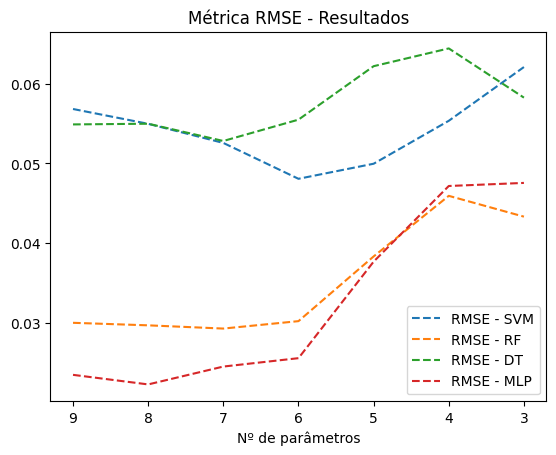

In [129]:
# RMSE Line Plotting

fig, ax = plt.subplots()

rmse_metric_svm = ax.plot(x_axis, rmse_svm, color=colors[0], label="RMSE - SVM", linestyle='--')
rmse_metric_rf = ax.plot(x_axis, rmse_rf, color=colors[1], label="RMSE - RF", linestyle='--')
rmse_metric_dt = ax.plot(x_axis, rmse_dt, color=colors[2], label="RMSE - DT", linestyle='--')
rmse_metric_mlp = ax.plot(x_axis, rmse_mlp, color=colors[3], label="RMSE - MLP", linestyle='--')

ax.invert_xaxis()

plt.xticks(rotation=0)

ax.set_title("Métrica RMSE - Resultados")

ax.set_xlabel("Nº de parâmetros")

ax.legend()
plt.savefig("./images/metrics/RMSE_results_rank1.png", bbox_inches='tight')
plt.show()

## IQA esperado x IQA obtido - Todos os parâmetros

In [130]:
# Plot expected targets X predicted targets

csv_dataframe['Data Coleta'] = pd.to_datetime(csv_dataframe['Data Coleta'])

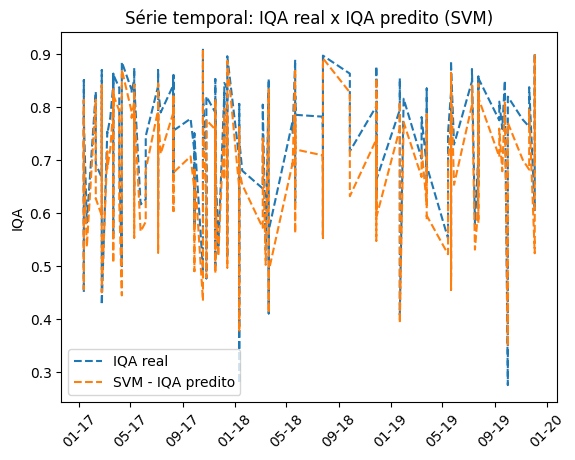

In [131]:
# Line Plot of observed values and predicted values

fig, ax = plt.subplots()
ax.plot(csv_dataframe['Data Coleta'], csv_dataframe['y_test'], color=colors[0], label='IQA real', linestyle='--')
ax.plot(csv_dataframe['Data Coleta'], csv_dataframe['svm_target'], color=colors[1], label='SVM - IQA predito', linestyle='--')

# Define the date format
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45)
ax.set_title("Série temporal: IQA real x IQA predito (SVM)")
ax.set_ylabel("IQA")
ax.legend()
plt.savefig("./images/WQIs/all_parameters/SVM_rank1.png", bbox_inches='tight')
plt.show()

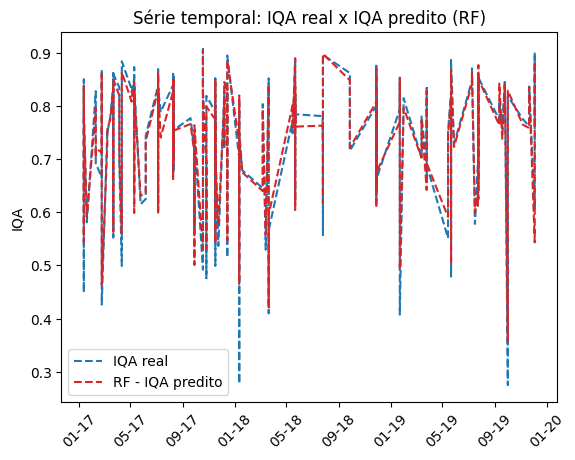

In [132]:
# Line Plot of observed values and predicted values

fig, ax = plt.subplots()
ax.plot(csv_dataframe['Data Coleta'], csv_dataframe['y_test'], color=colors[0], label='IQA real', linestyle='--')
ax.plot(csv_dataframe['Data Coleta'], csv_dataframe['rf_target'], color=colors[3], label='RF - IQA predito', linestyle='--')

# Define the date format
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45)
ax.set_title("Série temporal: IQA real x IQA predito (RF)")
ax.set_ylabel("IQA")
ax.legend()
plt.savefig("./images/WQIs/all_parameters/RF_rank1.png", bbox_inches='tight')
plt.show()

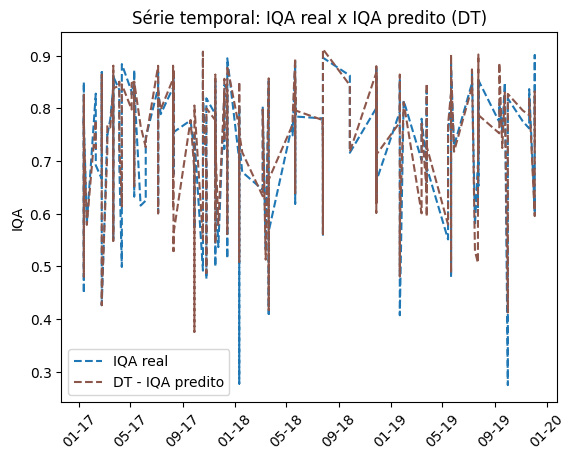

In [133]:
# Line Plot of observed values and predicted values

fig, ax = plt.subplots()
ax.plot(csv_dataframe['Data Coleta'], csv_dataframe['y_test'], color=colors[0], label='IQA real', linestyle='--')
ax.plot(csv_dataframe['Data Coleta'], csv_dataframe['dt_target'], color=colors[5], label='DT - IQA predito', linestyle='--')

# Define the date format
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45)
ax.set_title("Série temporal: IQA real x IQA predito (DT)")
ax.set_ylabel("IQA")
ax.legend()
plt.savefig("./images/WQIs/all_parameters/DT_rank1.png", bbox_inches='tight')
plt.show()

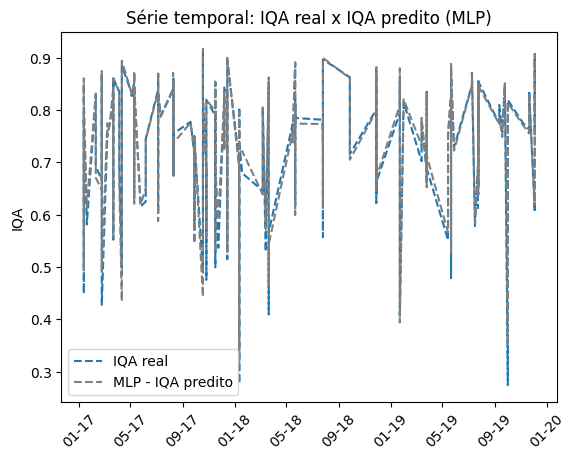

In [134]:
# Line Plot of observed values and predicted values

fig, ax = plt.subplots()
ax.plot(csv_dataframe['Data Coleta'], csv_dataframe['y_test'], color=colors[0], label='IQA real', linestyle='--')
ax.plot(csv_dataframe['Data Coleta'], csv_dataframe['mlp_target'], color=colors[7], label='MLP - IQA predito', linestyle='--')

# Define the date format
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45)
ax.set_title("Série temporal: IQA real x IQA predito (MLP)")
ax.set_ylabel("IQA")
ax.legend()
plt.savefig("./images/WQIs/all_parameters/MLP_rank1.png", bbox_inches='tight')
plt.show()

## IQA esperado x IQA obtido - 3 parâmetros

In [135]:
# Plot expected targets X predicted targets for 3 parameters

csv_dataframe_3params['Data Coleta'] = pd.to_datetime(csv_dataframe_3params['Data Coleta'])

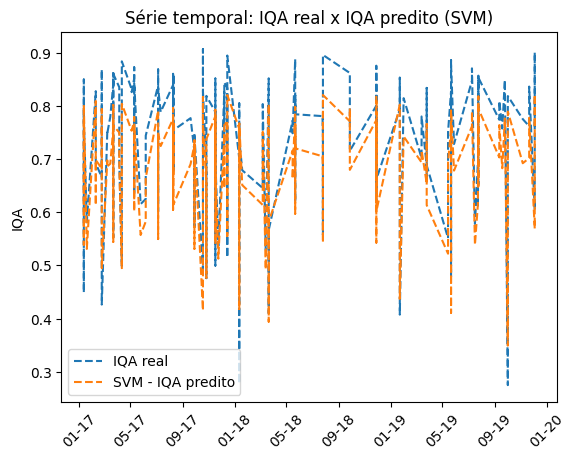

In [136]:
# Line Plot of observed values and predicted values

fig, ax = plt.subplots()
ax.plot(csv_dataframe_3params['Data Coleta'], csv_dataframe_3params['y_test'], color=colors[0], label='IQA real', linestyle='--')
ax.plot(csv_dataframe_3params['Data Coleta'], csv_dataframe_3params['svm_target'], color=colors[1], label='SVM - IQA predito', linestyle='--')

# Define the date format
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45)
ax.set_title("Série temporal: IQA real x IQA predito (SVM)")
ax.set_ylabel("IQA")
ax.legend()
plt.savefig("./images/WQIs/3_parameters/SVM_rank1.png", bbox_inches='tight')
plt.show()

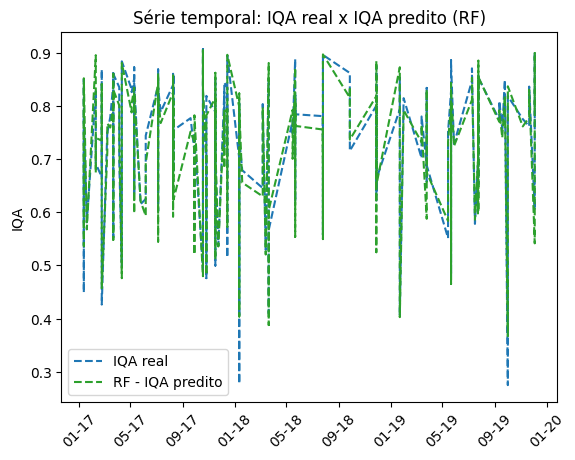

In [137]:
# Line Plot of observed values and predicted values

fig, ax = plt.subplots()
ax.plot(csv_dataframe_3params['Data Coleta'], csv_dataframe_3params['y_test'], color=colors[0], label='IQA real', linestyle='--')
ax.plot(csv_dataframe_3params['Data Coleta'], csv_dataframe_3params['rf_target'], color=colors[2], label='RF - IQA predito', linestyle='--')

# Define the date format
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45)
ax.set_title("Série temporal: IQA real x IQA predito (RF)")
ax.set_ylabel("IQA")
ax.legend()
plt.savefig("./images/WQIs/3_parameters/RF_rank1.png", bbox_inches='tight')
plt.show()

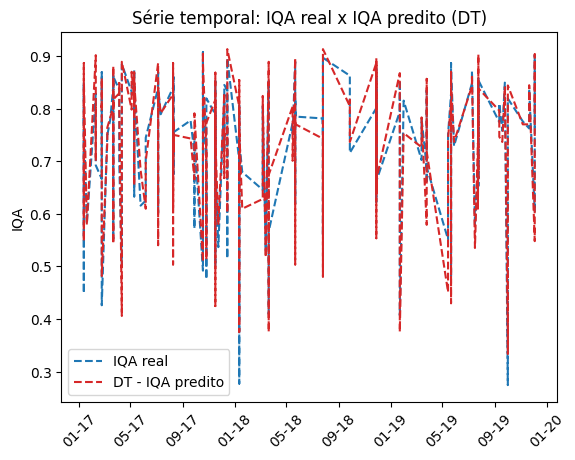

In [138]:
# Line Plot of observed values and predicted values

fig, ax = plt.subplots()
ax.plot(csv_dataframe_3params['Data Coleta'], csv_dataframe_3params['y_test'], color=colors[0], label='IQA real', linestyle='--')
ax.plot(csv_dataframe_3params['Data Coleta'], csv_dataframe_3params['dt_target'], color=colors[3], label='DT - IQA predito', linestyle='--')

# Define the date format
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45)
ax.set_title("Série temporal: IQA real x IQA predito (DT)")
ax.set_ylabel("IQA")
ax.legend()
plt.savefig("./images/WQIs/3_parameters/DT_rank1.png", bbox_inches='tight')
plt.show()

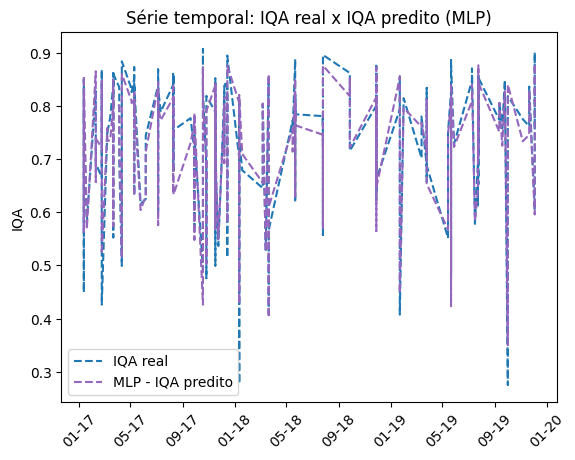

In [139]:
# Line Plot of observed values and predicted values

fig, ax = plt.subplots()
ax.plot(csv_dataframe_3params['Data Coleta'], csv_dataframe_3params['y_test'], color=colors[0], label='IQA real', linestyle='--')
ax.plot(csv_dataframe_3params['Data Coleta'], csv_dataframe_3params['mlp_target'], color=colors[4], label='MLP - IQA predito', linestyle='--')

# Define the date format
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45)
ax.set_title("Série temporal: IQA real x IQA predito (MLP)")
ax.set_ylabel("IQA")
ax.legend()
plt.savefig("./images/WQIs/3_parameters/MLP_rank1.png", bbox_inches='tight')
plt.show()

## Algorithm metrics dataframe heatmap

In [140]:
Index = x_axis

Columns = ["SVM", "RF", "DT", "MLP"]

CMAP = sns.color_palette("coolwarm", as_cmap=True)
CMAP_R = sns.color_palette("coolwarm_r", as_cmap=True)

# Create algorithm Dataframes
r2_svm_series = pd.DataFrame(r2_svm, index=Index)
r2_rf_series = pd.DataFrame(r2_rf, index=Index)
r2_dt_series = pd.DataFrame(r2_dt, index=Index)
r2_mlp_series = pd.DataFrame(r2_mlp, index=Index)

r_svm_series = pd.DataFrame(r_svm, index=Index)
r_rf_series = pd.DataFrame(r_rf, index=Index)
r_dt_series = pd.DataFrame(r_dt, index=Index)
r_mlp_series = pd.DataFrame(r_mlp, index=Index)

rmse_svm_series = pd.DataFrame(rmse_svm, index=Index)
rmse_rf_series = pd.DataFrame(rmse_rf, index=Index)
rmse_dt_series = pd.DataFrame(rmse_dt, index=Index)
rmse_mlp_series = pd.DataFrame(rmse_mlp, index=Index)

mse_svm_series = pd.DataFrame(mse_svm, index=Index)
mse_rf_series = pd.DataFrame(mse_rf, index=Index)
mse_dt_series = pd.DataFrame(mse_dt, index=Index)
mse_mlp_series = pd.DataFrame(mse_mlp, index=Index)

mae_svm_series = pd.DataFrame(mae_svm, index=Index)
mae_rf_series = pd.DataFrame(mae_rf, index=Index)
mae_dt_series = pd.DataFrame(mae_dt, index=Index)
mae_mlp_series = pd.DataFrame(mae_mlp, index=Index)

# Create R2 dataframe
r2_df = pd.concat([r2_svm_series, r2_rf_series, r2_dt_series, r2_mlp_series], ignore_index=True, axis=1)
r2_df = pd.DataFrame(r2_df)
r2_df = r2_df.set_axis(Columns, axis=1)

# Create R dataframe
r_df = pd.concat([r_svm_series, r_rf_series, r_dt_series, r_mlp_series], ignore_index=True, axis=1)
r_df = pd.DataFrame(r_df)
r_df = r_df.set_axis(Columns, axis=1)

# Create RMSE dataframe
rmse_df = pd.concat([rmse_svm_series, rmse_rf_series, rmse_dt_series, rmse_mlp_series], ignore_index=True, axis=1)
rmse_df = pd.DataFrame(rmse_df)
rmse_df = rmse_df.set_axis(Columns, axis=1)

# Create MSE dataframe
mse_df = pd.concat([mse_svm_series, mse_rf_series, mse_dt_series, mse_mlp_series], ignore_index=True, axis=1)
mse_df = pd.DataFrame(mse_df)
mse_df = mse_df.set_axis(Columns, axis=1)

# Create MAE dataframe
mae_df = pd.concat([mae_svm_series, mae_rf_series, mae_dt_series, mae_mlp_series], ignore_index=True, axis=1)
mae_df = pd.DataFrame(mae_df)
mae_df = mae_df.set_axis(Columns, axis=1)

### R²

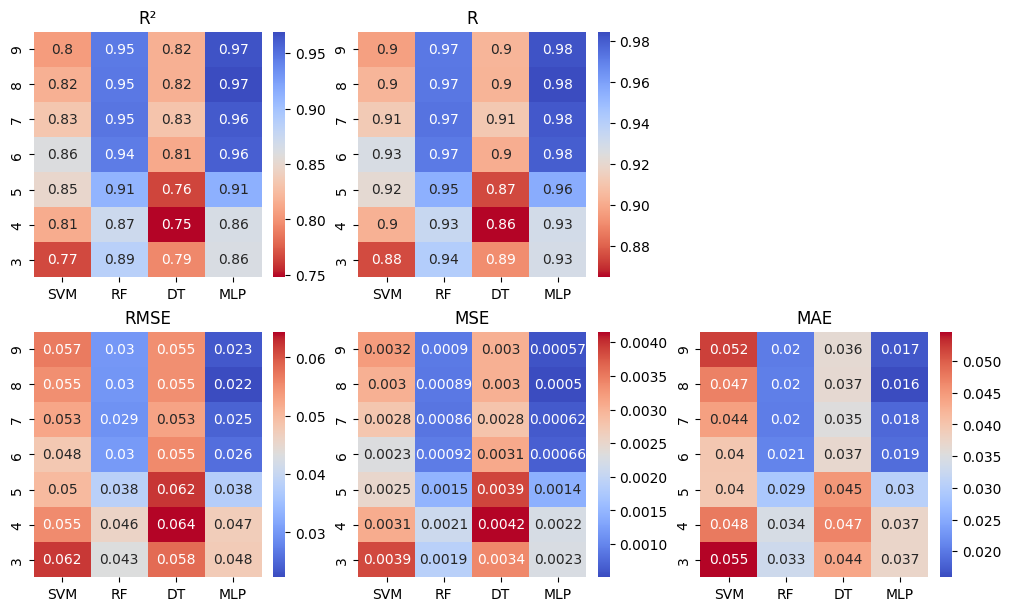

In [141]:
# Create heatmap with seaborn and title with matplotlib

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 6), layout='constrained')

ax[0,0] = sns.heatmap(r2_df, annot=True, cmap=CMAP_R, ax=ax[0,0])
ax[0,0].set_title("R²")

ax[0,1] = sns.heatmap(r_df, annot=True, cmap=CMAP_R, ax=ax[0,1])
ax[0,1].set_title("R")

ax[1,0] = sns.heatmap(rmse_df, annot=True, cmap=CMAP, ax=ax[1,0])
ax[1,0].set_title("RMSE")

ax[1,1] = sns.heatmap(mse_df, annot=True, cmap=CMAP, ax=ax[1,1])
ax[1,1].set_title("MSE")

ax[1,2] = sns.heatmap(mae_df, annot=True, cmap=CMAP, ax=ax[1,2])
ax[1,2].set_title("MAE")

fig.delaxes(ax[0,2]) # delete empty plot

fig.savefig("./images/heatmaps/heatmaps_rank1.png", bbox_inches='tight')

plt.show()